In [2]:
#=========================================================================
# load up the libraries
#=========================================================================
import pandas  as pd
import numpy   as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering 
from sklearn.decomposition import PCA

#=========================================================================
# read in the data
#=========================================================================
df = pd.read_csv(r'../data/Wholesale_Data.csv',index_col=0)
print(df.columns)

print("number of rows on the dataset = " + str(len(df)))

Index(['Region', 'Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper',
       'Delicassen'],
      dtype='object')
number of rows on the dataset = 440


### `Part I`

##### ```Data Cleaning```

In [3]:
# Check for missing values
missing_values = df.isnull().sum()

# Handle missing values
df.dropna(inplace=True)

# Check for duplicates
duplicate_rows = df[df.duplicated()]
df.drop_duplicates(inplace=True)

print("number of rows on the dataset after Data Cleaning = " + str(len(df)))

number of rows on the dataset after Data Cleaning = 440


##### `Data Visualization`

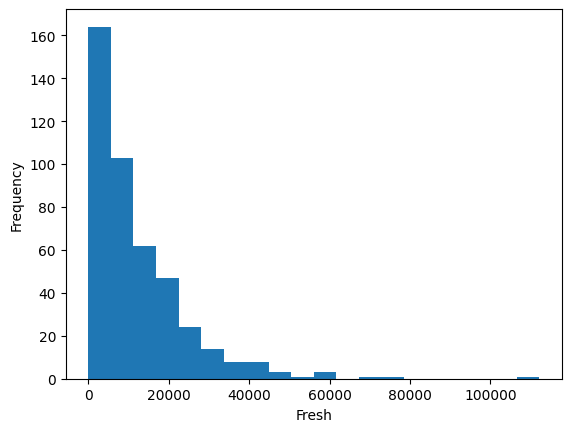

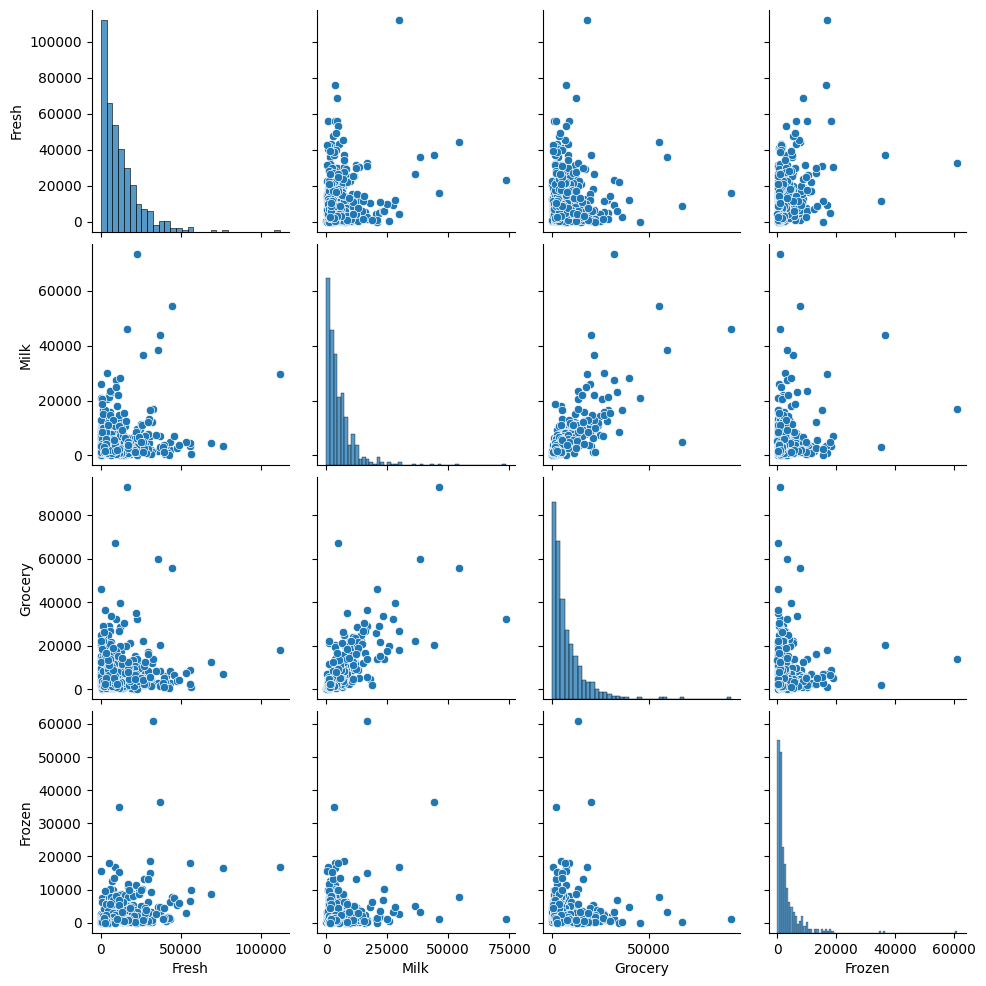

In [4]:
# Histogram of 'Fresh' column
plt.hist(df['Fresh'], bins=20)
plt.xlabel('Fresh')
plt.ylabel('Frequency')
plt.show()

# Pair plot for selected columns
sns.pairplot(df[['Fresh', 'Milk', 'Grocery', 'Frozen']])
plt.show()


##### `Outlier Detection and Data Visualization Before Cleaning`

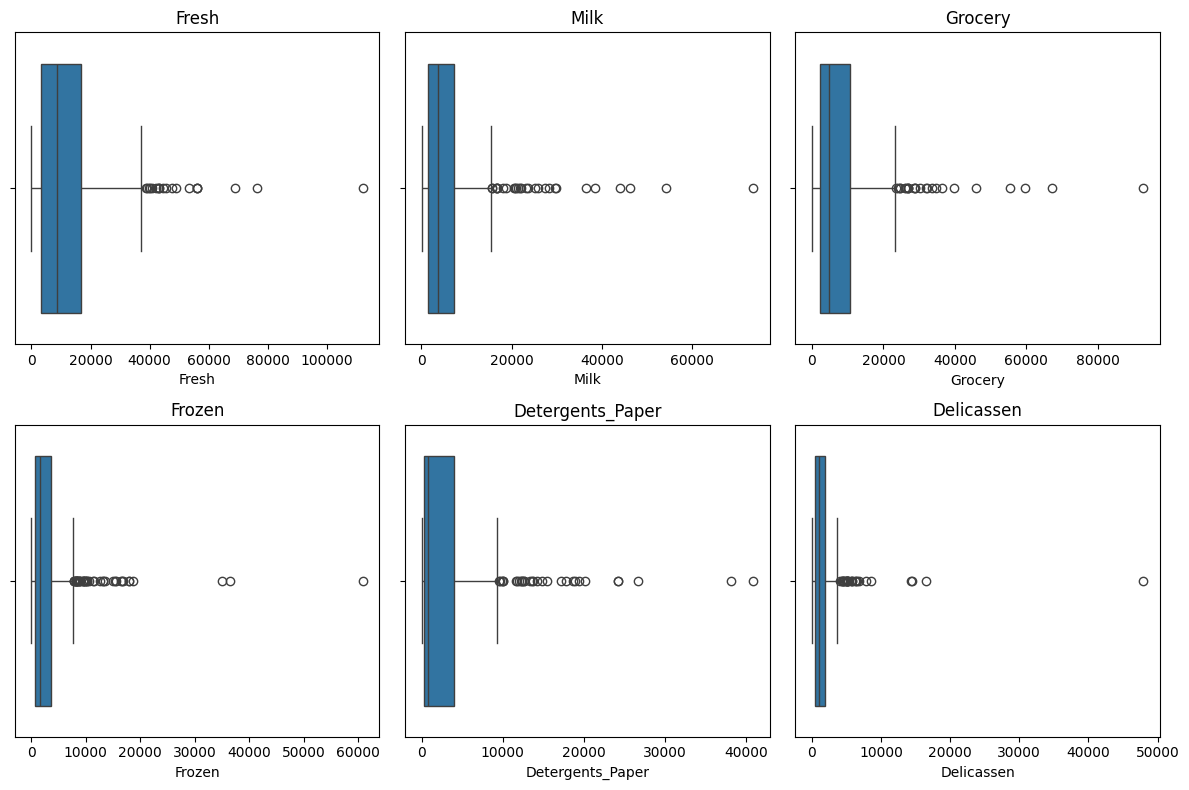

In [5]:
# Create a boxplot for each numerical column before cleaning outliers
plt.figure(figsize=(12, 8))
columns = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']

for i, col in enumerate(columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

##### `Outlier Detection and Removal`

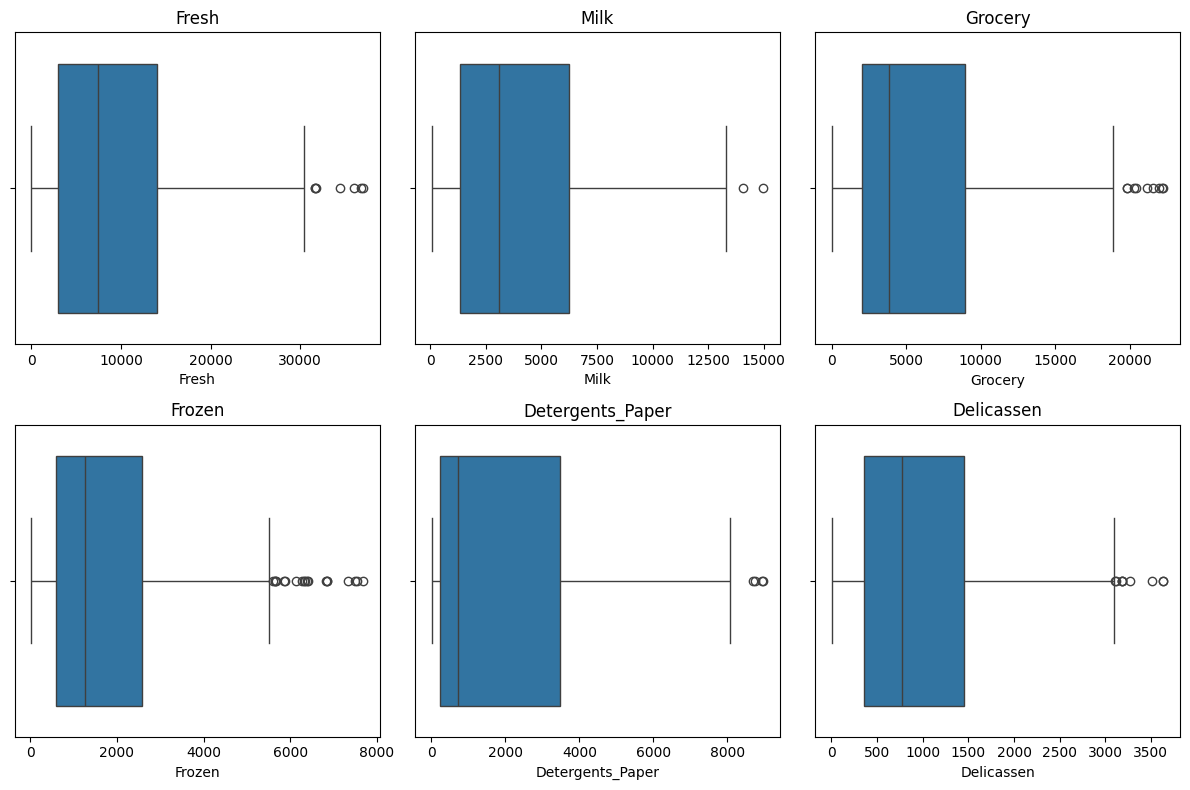

In [6]:
# Outlier detection and removal using IQR method for each column
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
outliers_removed = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

# Visualize boxplots after cleaning outliers
plt.figure(figsize=(12, 8))
for i, col in enumerate(columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=outliers_removed[col])
    plt.title(col)
plt.tight_layout()
plt.show()

##### `Data Visualization After Cleaning`

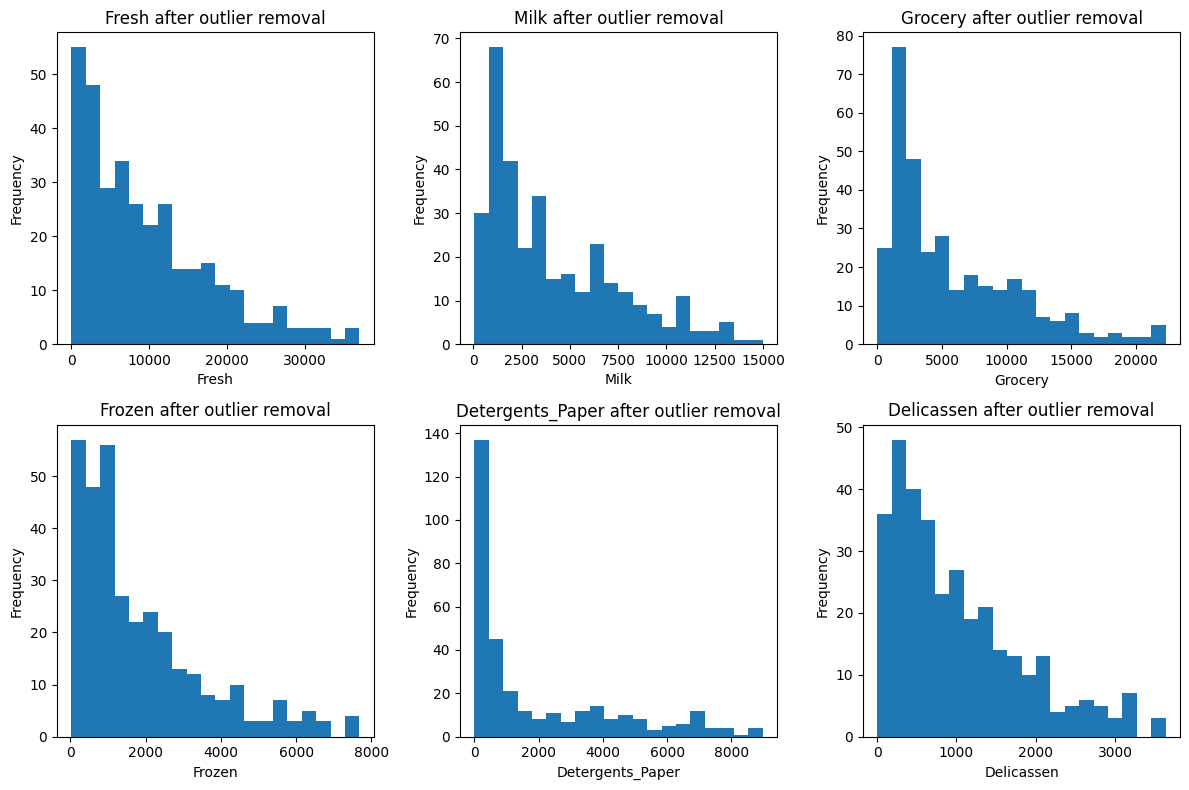

In [7]:
# Redo the data visualization after outlier removal
plt.figure(figsize=(12, 8))
for i, col in enumerate(columns, 1):
    plt.subplot(2, 3, i)
    plt.hist(outliers_removed[col], bins=20)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title(f'{col} after outlier removal')
plt.tight_layout()
plt.show()

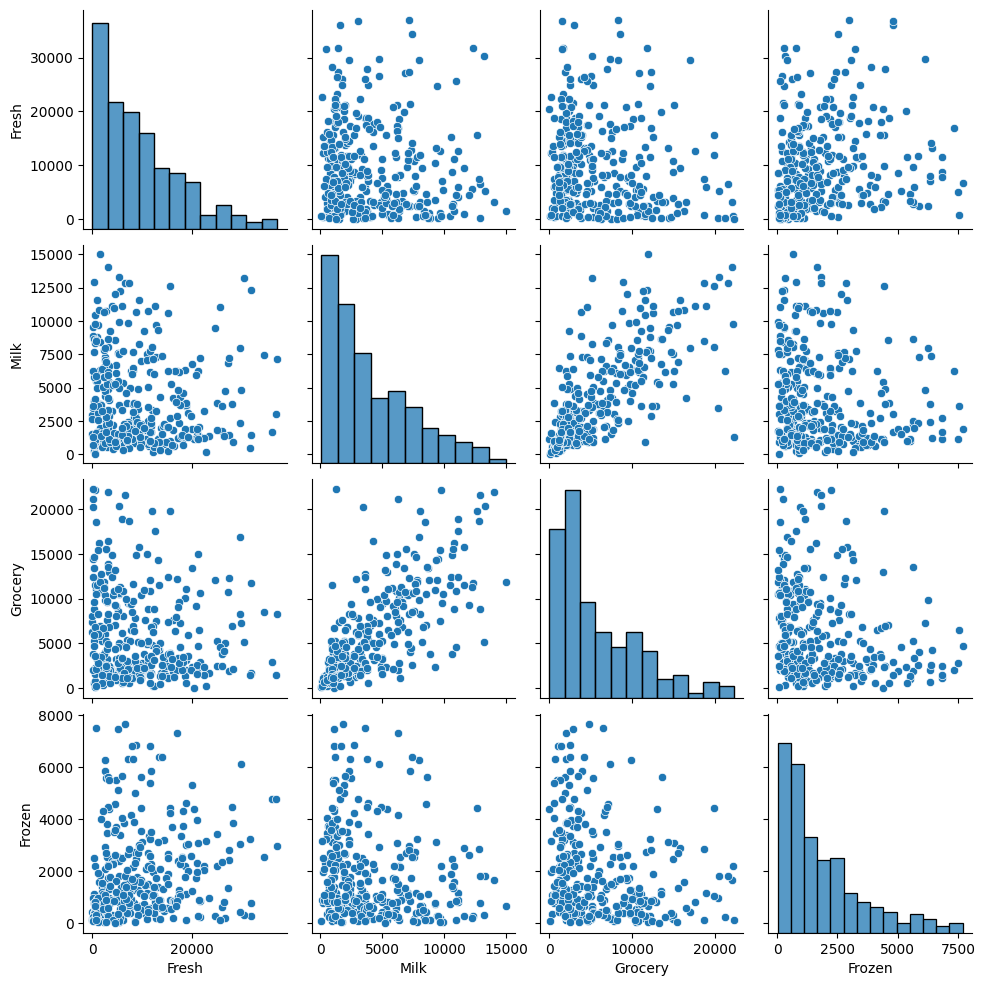

In [8]:
# Pair plot for selected columns
sns.pairplot(outliers_removed[['Fresh', 'Milk', 'Grocery', 'Frozen']])
plt.show()

In [9]:
df = outliers_removed
print("number of rows on the dataset after Data Cleaning = " + str(len(df)))

number of rows on the dataset after Data Cleaning = 332


##### `Correlation Analysis`

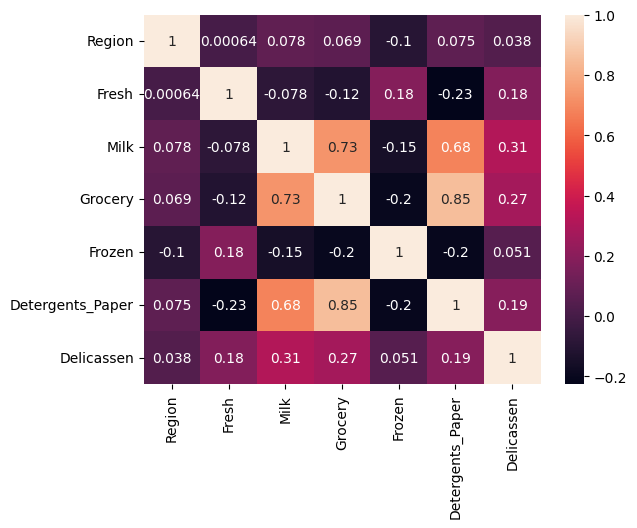

In [10]:
# Calculate correlation matrix
correlation_matrix = df.corr()

# Visualize correlation matrix using a heatmap
sns.heatmap(correlation_matrix, annot=True)
plt.show()

##### `Data Transformation`

In [11]:
#######################################################################################
###### scaled_data will be used to perform KMeans Clustering on the Part II ###########
#######################################################################################

# Example of standardizing the dataset using StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Example of normalizing the dataset using MinMaxScaler
minmax_scaler = MinMaxScaler()
normalized_data = minmax_scaler.fit_transform(df)

##### `Feature Selection`

In [12]:
X = df[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']]
y = df[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper']]

# Train the random forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

# Get feature importances
importances = model.feature_importances_
feature_names = X.columns

# Display feature importances
for feature_name, importance in zip(feature_names, importances):
    print(f"Feature: {feature_name}, Importance: {importance}")

Feature: Fresh, Importance: 0.6077892677401892
Feature: Milk, Importance: 0.051042243712917656
Feature: Grocery, Importance: 0.29450546280514556
Feature: Frozen, Importance: 0.022847733677361336
Feature: Detergents_Paper, Importance: 0.017958421059028132
Feature: Delicassen, Importance: 0.005856871005358108


### `Part II`

##### `KMeans Clustering`

C:\Users\leoau\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\leoau\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\leoau\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set

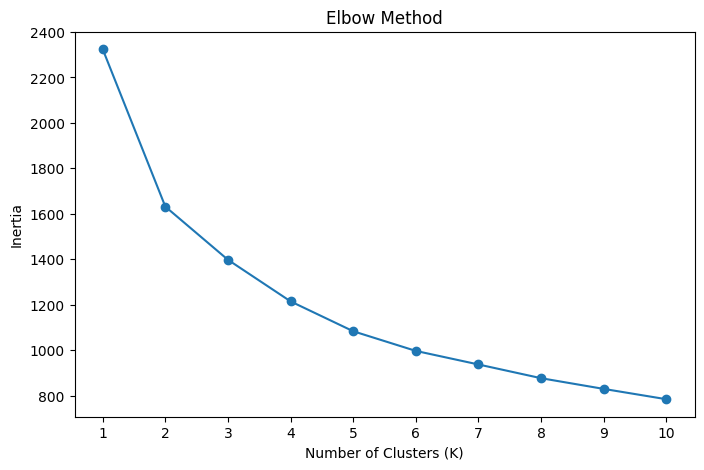

In [13]:
# Empty lists to store inertia (variance explained) and K values
inertia = []
k_values = range(1, 11)  # Trying different values of K from 1 to 10

# Fit KMeans for each K value and calculate inertia
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(scaled_data) # scaled_data is from Part I - Data Transformation
    inertia.append(kmeans.inertia_)

# Plotting the Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.xticks(k_values)
plt.show()

### `Part III`

##### `Hierarchical Clustering`

In [14]:
# Generating a synthetic dataset with 150 samples and 2 features, forming 4 clusters 
X, y = make_blobs(n_samples=300,
                  n_features=2,
                  centers=4,
                  cluster_std=0.5,
                  random_state=0)

# Function to plot clusters
def plot_clusters(X,y_res, plt_cluster_centers = False):
    X_centroids = []
    Y_centroids = []
    
    for cluster in set(y_res):
        x = X[y_res == cluster,0]
        y = X[y_res == cluster,1]
        X_centroids.append(np.mean(x))
        Y_centroids.append(np.mean(y))
        
        # Plotting data points for each cluster
        plt.scatter(x,
                    y,
                    s=50,
                    marker='s',
                    label=f'cluster {cluster}')
        
    if plt_cluster_centers:
        plt.scatter(X_centroids,
                    Y_centroids,
                    marker='*',
                    c='red',
                    s=250,
                    label='centroids')
    plt.legend()
    plt.grid()
    plt.show()


C:\Users\leoau\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


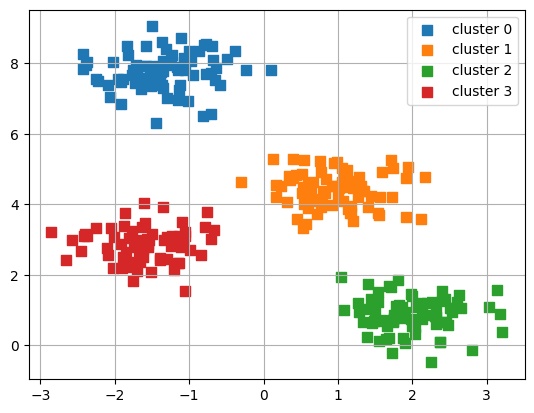

In [15]:
# Applying Agglomerative Clustering with specific parameters
ac = AgglomerativeClustering(affinity='euclidean',
                             linkage='ward',
                             n_clusters = 4)

# Performing clustering and generating cluster labels for each sample
y_hc = ac.fit_predict(X)

# Plotting the clusters
plot_clusters(X,y_hc)

In [16]:
# define plot_dendrogram function
def plot_dendrogram(X,method ='ward'):
    dendrogram = sch.dendrogram(sch.linkage(X, method=method))
    plt.title("Dendrogram")
    plt.ylabel("Euclidean distances")
    plt.xlabel('Points')
    plt.show()

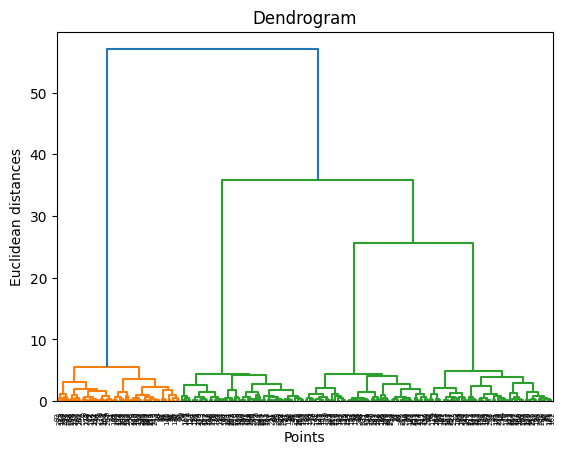

In [17]:
plot_dendrogram(X)

### `Part IV`

##### `PCA`

Explained variance ratio: [0.38983048 0.18562331 0.1451357  0.11490245 0.09825778 0.04702833]
Cumulative explained variance: [0.38983048 0.57545378 0.72058948 0.83549193 0.93374971 0.98077804]


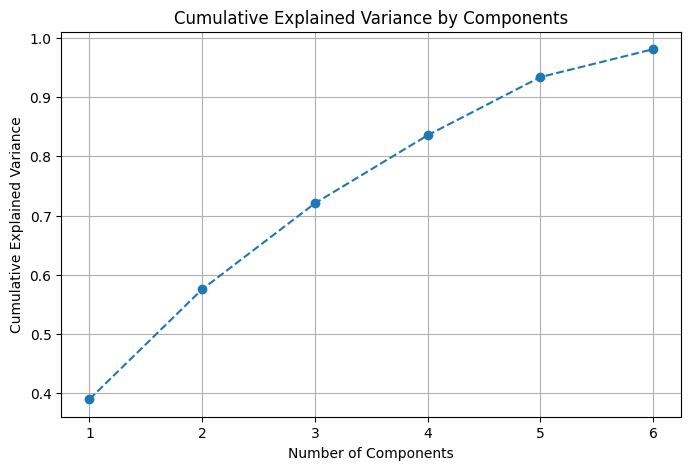

In [18]:
# Perform PCA
pca = PCA(n_components=6)  # Considering all components for now
pca.fit(scaled_data)

# Explained variance ratio
explained_var = pca.explained_variance_ratio_
print('Explained variance ratio:', explained_var)

# Cumulative explained variance
cumulative_var = explained_var.cumsum()
print('Cumulative explained variance:', cumulative_var)

# Plotting the explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_var) + 1), cumulative_var, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by Components')
plt.xticks(range(1, len(explained_var) + 1))
plt.grid(True)
plt.show()